# Plan
1. Count frequency of results of 100,000 simulations.  Output results as table and bar chart for first 1-10 cards drawn.
2. Calculate the mean number of cards drawn from GeometricWithoutReplacement distribution with parameters n=111, k=36 and sample mean from step 1.
3. Calculate the pmf GeometricWithoutReplacement distribution for x=1-10.
4. Plot simulation frequencies side by side with GeometricWithoutReplacement pmf.
5. Calculate probability of drawing 7 cards or more.
6. Calculate number of shuffles for deck of 112 cards.

In [13]:
using Pkg
Pkg.activate("..")

import Distributions
import PrettyTables
import StatsBase
import Statistics

include("../lib/geometric_without_replacement.jl")

using Plots
gr()

  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/PersonalSite/additional-post-materials/2023-09-01_Uno/Uno.jl`


Plots.GRBackend()

### 1. Count frequency of results of 100,000 simulations.  Output results as table and bar chart for first 1-10 cards drawn.

In [14]:
str = String(read("../input/100_000.samples.txt"))
samples = parse.(Int, split(str))

frequencies = StatsBase.countmap(samples)

Dict{Int64, Int64} with 26 entries:
  5  => 6877
  16 => 48
  20 => 6
  12 => 378
  24 => 3
  28 => 1
  8  => 2109
  17 => 34
  1  => 32437
  19 => 12
  22 => 1
  23 => 3
  6  => 4615
  11 => 628
  9  => 1369
  14 => 155
  3  => 14826
  7  => 2959
  4  => 10279
  13 => 223
  15 => 109
  2  => 22039
  10 => 859
  18 => 22
  21 => 7
  26 => 1

In [15]:
# Plot only the first 10 values of x.
first10 = filter(x -> 1 <= x.first <= 10, frequencies)

open("../output/sample-frequency-table.tex", "w") do f
  PrettyTables.pretty_table(f, first10, 
    backend = Val(:latex), 
    sortkeys = true, 
    header = ["number of cards drawn", "frequency"]
  )
end

In [16]:
titlefontsize=10
ylabelsize=10

10

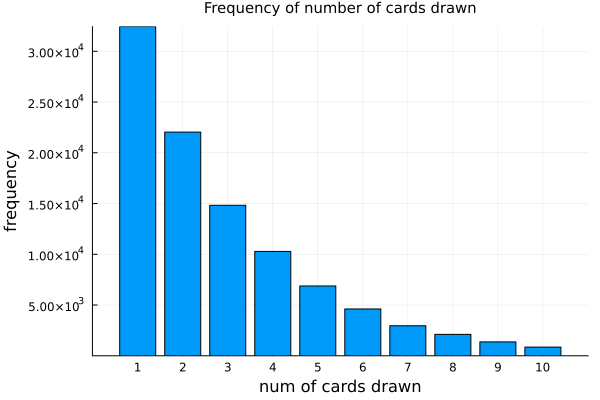

In [17]:
sortedkeys = sort(collect(keys(first10)))
sortedvalues = [first10[key] for key in sortedkeys]

freqplot = bar(sortedkeys, 
  sortedvalues, 
  legend=false,
  yticks=5_000:5_000:35_000, 
  title="Frequency of number of cards drawn",
  titlefontsize=titlefontsize,
  xticks=1:10,
  ylabel="frequency",
  fontsize=10,
  xlabel="num of cards drawn"
  
)

savefig("../output/samples-bar-chart.png")
freqplot


### 2. Calculate the mean number of cards drawn from GeometricWithoutReplacement distribution with parameters n=111, k=36 and sample mean from step 1.

In [18]:
d = GeometricWithoutReplacement(111, 36)

mean(d), Statistics.mean(samples)

(3.027027027027027, 3.03282)

### 3. Calculate the pmf GeometricWithoutReplacement distribution for x=1-10.

In [19]:
probsdict = Dict(i => round(pmf(d, i), digits=3) for i in 1:10)

open("../output/pmf-table.tex", "w") do f
  PrettyTables.pretty_table(f, probsdict, 
    backend = Val(:latex), 
    sortkeys = true, 
    header = ["num of cards drawn", "P(X = x)"]
  )
end


### 4. Plot simulation frequencies side by side with GeometricWithoutReplacement pmf.

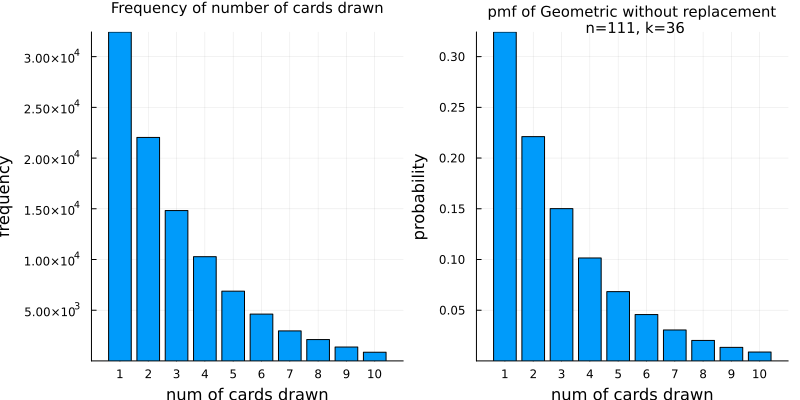

In [20]:
pmfplot = bar(1:10, 
  pmf(d, 1:10),
  legend=false,
  yticks=0.05:0.05:0.3,
  title="pmf of Geometric without replacement\n n=111, k=36",
  xticks=1:10,
  ylabel="probability",
  xlabel="num of cards drawn",
  titlefontsize=10,
  fontsize=10
)

sidebyside = plot(freqplot, pmfplot, 
  size = (800, 400),
  layout = (@layout [ p1 p2 ])
) 

savefig("../output/side-by-side.png")
sidebyside

### 5. Calculate probability of drawing 7 cards or more.

$$ P(X >= 7) = 1 - P(X <= 6) $$

In [21]:
round(1 - cdf(d, 6), digits=3)

0.089

### 6. Calculate number of shuffles necessary to shuffle deck of 112 cards.

In [22]:
num_shuffles(n) = (3/2)*log(2, n)

round(num_shuffles(112), digits=3)

10.211